In [1]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather

#move up in directory
os.chdir('../')
# os.getcwd()

In [2]:
from helpers import dot2_

In [3]:
path_to_test_runs = 'data/rnn_raw_data/'

In [4]:
# CONFIG
NUM_IDS = 10
NUM_RUNS = 10
TEST_SDS = np.arange(0.04, 0.32, 0.02)

In [5]:
def get_accuracy_by_id_sd(train_sd, test_sd_range, num_runs, num_ids, reward_type):   
    i = 0
    # convert float to str
    for id_ in range(NUM_IDS):
            for sd in TEST_SDS:
                            
                test_sd = dot2_(sd)
                
                file_string = 'all_{}_test_runs_train_sd_{}_id_{}_test_sd_{}'

                if i == 0:
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(reward_type, train_sd, id_, test_sd), 'rb'))                
                    all_means_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','rnn_test_sd']).accuracy.mean()
                    all_means_by_id_sd = all_means_by_id_sd.groupby(['rnn_id','rnn_test_sd']).median()


                else:
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(reward_type, train_sd, id_, test_sd), 'rb'))
                    means_by_id_sd = all_test_runs.groupby(['rnn_id', 'run', 'rnn_test_sd']).accuracy.mean()
                    means_by_id_sd = means_by_id_sd.groupby(['rnn_id', 'rnn_test_sd']).median()
                    all_means_by_id_sd = pd.concat([all_means_by_id_sd, means_by_id_sd])
                i += 1
                
    return(all_means_by_id_sd)

In [6]:
# get number of switches per run and instance for one sd

def get_medians_switches_by_id_sd(train_sd, test_sd_range, num_runs, num_ids, reward_type):   
    i = 0
    # convert float to str
    for id_ in range(NUM_IDS):
            for sd in TEST_SDS:
                            
                test_sd = dot2_(sd)
                
                file_string = 'all_{}_test_runs_train_sd_{}_id_{}_test_sd_{}'

                if i == 0:
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(reward_type, train_sd, id_, test_sd), 'rb'))                
                    is_switch = [int(all_test_runs.choice[t] != all_test_runs.choice[t-1]) for t in range(1, len(all_test_runs.choice))]
                    is_switch = np.append(0, is_switch)
                    all_test_runs['is_switch'] = is_switch                    
                    all_median_switches_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','rnn_test_sd']).is_switch.mean()
                    all_median_switches_by_id_sd = all_median_switches_by_id_sd.groupby(['rnn_id','rnn_test_sd']).median()

                else:
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(reward_type, train_sd, id_, test_sd), 'rb'))
                    is_switch = [int(all_test_runs.choice[t] != all_test_runs.choice[t-1]) for t in range(1, len(all_test_runs.choice))]
                    is_switch = np.append(0, is_switch)
                    all_test_runs['is_switch'] = is_switch
                    median_switches_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','rnn_test_sd']).is_switch.mean()
                    median_switches_by_id_sd = median_switches_by_id_sd.groupby(['rnn_id', 'rnn_test_sd']).median()
                    all_median_switches_by_id_sd = pd.concat([all_median_switches_by_id_sd, median_switches_by_id_sd])
                i += 1
                
    return(all_median_switches_by_id_sd)

# Binary Rewards

In [9]:
median_acc_05 = get_accuracy_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

median_acc_1 = get_accuracy_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

median_acc_meta = get_accuracy_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

KeyboardInterrupt: 

In [ ]:
df1 = mean_acc_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = mean_acc_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = mean_acc_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

# create hue variables
df1['train_sd'] =  mean_acc_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
df2['train_sd'] =  mean_acc_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
df3['train_sd'] =  mean_acc_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']


binary_plot_data = pd.concat([df1, df2, df3])

In [ ]:
# plot boxplot
plt.figure(figsize=(15, 5))

box = sns.boxplot(x = 'rnn_test_sd', y = 'accuracy', hue = 'train_sd', data=binary_plot_data, 
                 palette="colorblind")

box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='test sd', 
    ylabel='accuracy')

box.set_title('binary restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(dot2_(i))
box.set_xticklabels(x_ticks)            

plt.show()

## Number of Switches

In [ ]:
mean_switches_05 = get_mean_switches_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

mean_switches_1 = get_mean_switches_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

mean_switches_meta = get_mean_switches_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

In [ ]:
df1 = mean_switches_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = mean_switches_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = mean_switches_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

# create hue variables
df1['train_sd'] =  mean_switches_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
df2['train_sd'] =  mean_switches_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
df3['train_sd'] =  mean_switches_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']


binary_switch_plot_data = pd.concat([df1, df2, df3])

In [ ]:
# plot boxplot
plt.figure(figsize=(16, 8))

box = sns.boxplot(x = 'rnn_test_sd', y = 'is_switch', hue = 'train_sd', data=binary_switch_plot_data, 
                 palette="colorblind")

# box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='test sd', 
    ylabel='switches')

box.set_title('binary restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(dot2_(i))
box.set_xticklabels(x_ticks)            

plt.show()

# Continuous Rewards

In [7]:
median_acc_05 = get_accuracy_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

median_acc_1 = get_accuracy_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

median_acc_meta = get_accuracy_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

#all_lstm_ac_continuous_test_runs_train_sd_meta_volatility_id_9_test_sd_0_32

median_acc_lstm_meta = get_accuracy_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'lstm_ac_continuous')

# lstm a2c ew 0.05

median_acc_lstm_1 = get_accuracy_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'lstm_ac_continuous')

In [8]:
median_acc_lstm_1

rnn_id  rnn_test_sd
0       0.04           0.645000
        0.06           0.550000
        0.08           0.463333
        0.10           0.478333
        0.12           0.478333
                         ...   
9       0.24           0.380000
        0.26           0.298333
        0.28           0.310000
        0.30           0.306667
        0.32           0.295000
Name: accuracy, Length: 150, dtype: float64

In [9]:
median_acc_lstm_meta

rnn_id  rnn_test_sd
0       0.04           0.651667
        0.06           0.581667
        0.08           0.516667
        0.10           0.530000
        0.12           0.471667
                         ...   
9       0.24           0.360000
        0.26           0.338333
        0.28           0.315000
        0.30           0.306667
        0.32           0.290000
Name: accuracy, Length: 150, dtype: float64

In [10]:
df1 = median_acc_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = median_acc_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = median_acc_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

df4 = median_acc_lstm_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

df5 = median_acc_lstm_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})



In [11]:
# create hue variables
df1['train_sd'] =  median_acc_meta.reset_index(level='rnn_test_sd').shape[0] * ['RNN: Meta-Volatility']
df2['train_sd'] =  median_acc_1.reset_index(level='rnn_test_sd').shape[0] * ['RNN: Medium Volatility']
df3['train_sd'] =  median_acc_05.reset_index(level='rnn_test_sd').shape[0] * ['RNN: Low Volatility']

df4['train_sd'] =  median_acc_lstm_meta.reset_index(level='rnn_test_sd').shape[0] * ['LSTM + A2C: Meta-Volatility']
df5['train_sd'] =  median_acc_lstm_1.reset_index(level='rnn_test_sd').shape[0] * ['LSTM + A2C: Medium Volatility']



cont_plot_data = pd.concat([df1, df2, df3, df4, df5])

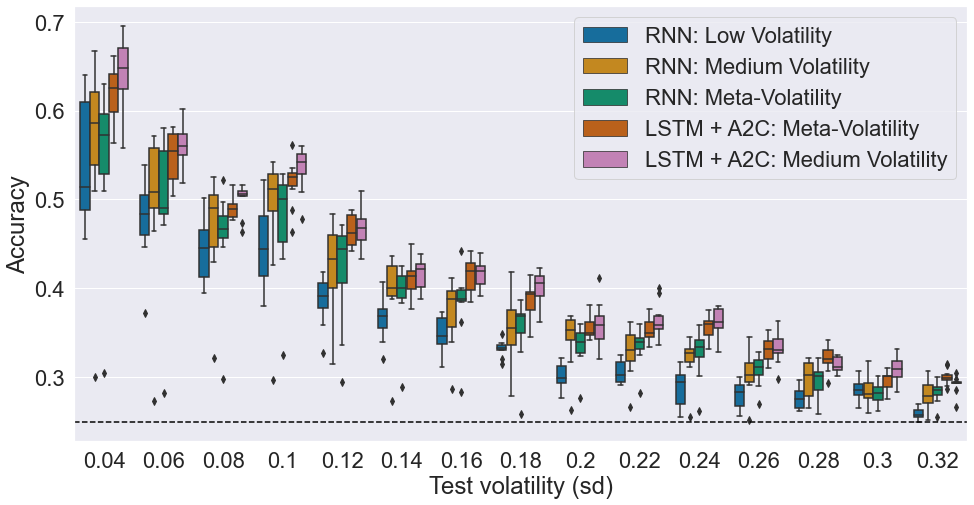

In [12]:
# plot boxplot
plt.figure(figsize=(16, 8))

sns.set(font_scale=2)

box = sns.boxplot(x = 'rnn_test_sd', y = 'accuracy', hue = 'train_sd', data=cont_plot_data, 
                 palette="colorblind", hue_order= ['RNN: Low Volatility'
                                                   , 'RNN: Medium Volatility'
                                                   ,'RNN: Meta-Volatility'
                                                  , 'LSTM + A2C: Meta-Volatility'
                                                  , 'LSTM + A2C: Medium Volatility'])

box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='Test volatility (sd)', 
    ylabel='Accuracy')

# box.set_title('continuous restless bandits')

legend = box.legend()


x_ticks = []
for i in TEST_SDS: x_ticks.append(str(round(i, 2)))
box.set_xticklabels(x_ticks)            

plt.show()

## Number of switches


In [15]:
median_switch_05 = get_medians_switches_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

median_switch_1 = get_medians_switches_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

median_switch_meta = get_medians_switches_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

median_switch_lstm_meta = get_medians_switches_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'lstm_ac_continuous')

median_switch_lstm_1 = get_medians_switches_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'lstm_ac_continuous')

KeyboardInterrupt: 

In [16]:
df1 = median_switch_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = median_switch_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = median_switch_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

df4=  median_switch_lstm_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df5=  median_switch_lstm_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})



In [17]:
# create hue variables
df1['train_sd'] =  median_switch_meta.reset_index(level='rnn_test_sd').shape[0]  * ['RNN: Meta-Volatility']
df2['train_sd'] =  median_switch_1.reset_index(level='rnn_test_sd').shape[0] * ['RNN: Medium Volatility']
df3['train_sd'] =  median_switch_05.reset_index(level='rnn_test_sd').shape[0] * ['RNN: Low Volatility']

df4['train_sd'] =  median_switch_lstm_meta.reset_index(level='rnn_test_sd').shape[0] *  ['LSTM + A2C: Meta-Volatility']
df5['train_sd'] =  median_switch_lstm_1.reset_index(level='rnn_test_sd').shape[0] *  ['LSTM + A2C: Medium Volatility']


cont_switch_plot_data = pd.concat([df1, df2, df3, df4, df5])

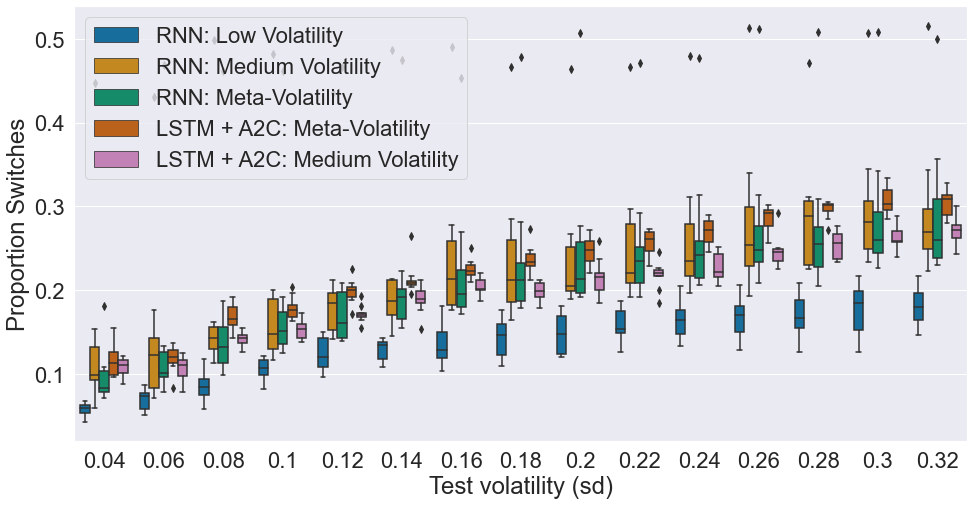

In [18]:
# plot boxplot
plt.figure(figsize=(16, 8))

sns.set(font_scale=2)

box = sns.boxplot(x = 'rnn_test_sd', y = 'is_switch', hue = 'train_sd', data=cont_switch_plot_data, 
                 palette="colorblind", hue_order= ['RNN: Low Volatility'
                                                   , 'RNN: Medium Volatility'
                                                   ,'RNN: Meta-Volatility'
                                                  , 'LSTM + A2C: Meta-Volatility'
                                                  , 'LSTM + A2C: Medium Volatility'])

# box.axhline(1/4, ls = '--', c = 'black')

# box.set_title('continuous restless bandits')

legend = box.legend()

box.set(
    xlabel='Test volatility (sd)', 
    ylabel='Proportion Switches')

x_ticks = []
for i in TEST_SDS: x_ticks.append(str(round(i, 2)))
box.set_xticklabels(x_ticks) 

plt.show()


# ML Curve-Fitting

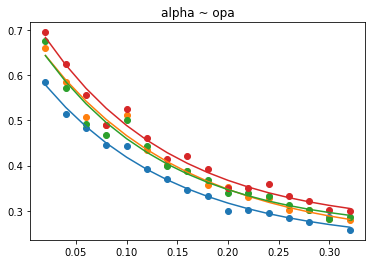

In [51]:
from scipy.optimize import curve_fit

cont_plot_data = cont_plot_data.groupby(['rnn_test_sd', 'train_sd']).median().reset_index()
cont_switch_plot_data = cont_switch_plot_data.groupby(['rnn_test_sd', 'train_sd']).median().reset_index()

# one-phase associative function
def opa_fct(x, y0, y_max, k):
    return y0 + (y_max-y0)*(1-np.exp(-k*x))

def fit_fct(x,y, fct):
    return(curve_fit(f=fct, xdata=x, ydata=y, p0=[0.01, 0.01], bounds=(0, np.inf)))

for i in ['.05', '.1', 'meta_volatility', 'aac_meta_vol.']:

    x = np.arange(0.02, 0.34, 0.02)
    y = cont_plot_data[cont_plot_data.train_sd == i].accuracy

    # one-phase associative function
    alpha_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.1], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_opa = opa_fct(x, *alpha_opa_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_alpha_opa, '-')
    plt.title('accuracy ~ opa')    

plt.show()

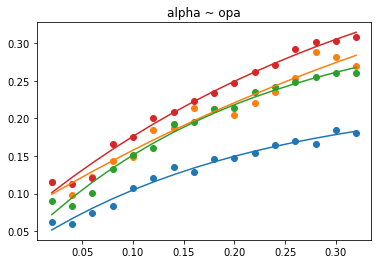

In [52]:
for i in ['.05', '.1', 'meta_volatility',  'aac_meta_vol.']:

    x = np.arange(0.02, 0.34, 0.02)
    y = cont_switch_plot_data[cont_switch_plot_data.train_sd == i].is_switch

    # one-phase associative function
    alpha_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.1], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_opa = opa_fct(x, *alpha_opa_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_alpha_opa, '-')
    plt.title('switches ~ opa')    

plt.show()

# Bayesian Curve-Fitting

In [58]:
# export median values

fit_path = 'data/intermediate_data/modeling/modeling_fits/'

feather.write_feather(cont_plot_data, fit_path + '/' + 'accuracy_test.feather')
feather.write_feather(cont_switch_plot_data, fit_path + '/' + 'switch_test.feather')